<a href="https://colab.research.google.com/github/Sanjanah8/Urban-Heat-Island-Effect/blob/main/guwahati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas folium pandas

In [ ]:
import pandas as pd
file_path = '/content/guwahati 2023-01-01 to 2023-12-31.csv'
data = pd.read_csv(file_path)


print(data.head())

hotspot_threshold = 35

hotspot_days = data[data['tempmax'] > hotspot_threshold]

print("Hotspot Days:")
print(hotspot_days[['datetime', 'tempmax']])


       name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  guwahati  2023-01-01     23.0     11.8  16.6          23.0          11.8   
1  guwahati  2023-01-02     22.8     11.4  16.4          22.8          11.4   
2  guwahati  2023-01-03     24.0     11.0  16.7          24.0          11.0   
3  guwahati  2023-01-04     23.8     11.1  16.7          23.8          11.1   
4  guwahati  2023-01-05     24.8     11.7  17.3          24.8          11.7   

   feelslike   dew  humidity  ...  solarenergy  uvindex  severerisk  \
0       16.6  13.8      85.4  ...         15.2        7          10   
1       16.4  13.4      84.7  ...         15.3        7          10   
2       16.7  13.1      82.7  ...         15.4        7          10   
3       16.7  13.6      84.4  ...         15.5        7          10   
4       17.3  13.9      83.5  ...         15.6        7          10   

               sunrise               sunset  moonphase  \
0  2023-01-01T06:10:29  2023-01-01T16:42

In [ ]:
# Generate green cover suggestions for each hotspot day
def suggest_green_cover(row):
    return (f"Date: {row['datetime']}\n"
            f"Max Temperature: {row['tempmax']}°C\n"
            f"Suggested Actions:\n"
            f"1. Increase Shade Trees in public areas.\n"
            f"2. Install Green Roofs on buildings.\n"
            f"3. Create Urban Green Spaces and Parks.\n")

# Apply the suggestion function to the hotspot days
hotspot_days['green_cover_suggestions'] = hotspot_days.apply(suggest_green_cover, axis=1)

# Display the green cover suggestions
print("\nGreen Cover Suggestions:")
print(hotspot_days[['datetime', 'green_cover_suggestions']])



Green Cover Suggestions:
       datetime                            green_cover_suggestions
67   2023-03-09  Date: 2023-03-09\nMax Temperature: 35.5°C\nSug...
69   2023-03-11  Date: 2023-03-11\nMax Temperature: 35.5°C\nSug...
70   2023-03-12  Date: 2023-03-12\nMax Temperature: 36.0°C\nSug...
71   2023-03-13  Date: 2023-03-13\nMax Temperature: 35.5°C\nSug...
72   2023-03-14  Date: 2023-03-14\nMax Temperature: 35.5°C\nSug...
97   2023-04-08  Date: 2023-04-08\nMax Temperature: 36.5°C\nSug...
98   2023-04-09  Date: 2023-04-09\nMax Temperature: 37.0°C\nSug...
99   2023-04-10  Date: 2023-04-10\nMax Temperature: 38.5°C\nSug...
100  2023-04-11  Date: 2023-04-11\nMax Temperature: 37.0°C\nSug...
101  2023-04-12  Date: 2023-04-12\nMax Temperature: 37.6°C\nSug...
102  2023-04-13  Date: 2023-04-13\nMax Temperature: 37.0°C\nSug...
103  2023-04-14  Date: 2023-04-14\nMax Temperature: 37.7°C\nSug...
104  2023-04-15  Date: 2023-04-15\nMax Temperature: 38.5°C\nSug...
105  2023-04-16  Date: 2023-04-16\nM

<ipython-input-4-260e28f8525f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotspot_days['green_cover_suggestions'] = hotspot_days.apply(suggest_green_cover, axis=1)


In [ ]:
import pandas as pd
import folium

# Load the dataset
file_path = '/content/guwahati 2023-01-01 to 2023-12-31.csv'
data = pd.read_csv(file_path)

# Define a temperature threshold for hotspots (e.g., tempmax > 35°C)
hotspot_threshold = 35

# Identify hotspot days
hotspot_days = data[data['tempmax'] > hotspot_threshold]

# Function to generate green cover suggestions
def suggest_green_cover(row):
    return (f"Date: {row['datetime']}\n"
            f"Max Temperature: {row['tempmax']}°C\n"
            f"Suggested Actions:\n"
            f"1. Increase Shade Trees.\n"
            f"2. Install Green Roofs.\n"
            f"3. Create Urban Green Spaces.\n")

# Add the green cover suggestions to the hotspot data
hotspot_days['green_cover_suggestions'] = hotspot_days.apply(suggest_green_cover, axis=1)

# Create a base map centered on Guwahati
guwahati_map = folium.Map(location=[26.1445, 91.7362], zoom_start=12)

# Add a marker for each hotspot day in a central location in Guwahati
for _, row in hotspot_days.iterrows():
    folium.Marker(
        location=[26.1445, 91.7362],  # Central location for Guwahati
        popup=row['green_cover_suggestions'],
        icon=folium.Icon(color='red', icon='fire', prefix='fa')
    ).add_to(guwahati_map)

# Save the map to an HTML file
guwahati_map.save("guwahati_hotspots_green_cover_suggestions.html")



<ipython-input-5-ccb5a9f8fcf4>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotspot_days['green_cover_suggestions'] = hotspot_days.apply(suggest_green_cover, axis=1)


In [ ]:
import pandas as pd
import folium

# Real-time place names and their corresponding coordinates in Guwahati
place_coordinates = {
    'Pan Bazaar': [26.1823, 91.7458],
    'Fancy Bazaar': [26.1832, 91.7412],
    'Paltan Bazaar': [26.1810, 91.7516],
    'Dispur': [26.1436, 91.7898],
    'Ulubari': [26.1761, 91.7523],
    'Beltola': [26.1145, 91.8077],
    'Ganeshguri': [26.1384, 91.7907],
    'Chandmari': [26.1872, 91.7743],
    'Guwahati University': [26.1511, 91.6657],
    'Jalukbari': [26.1573, 91.6846]
}

file_path = '/content/guwahati 2023-01-01 to 2023-12-31.csv'
data = pd.read_csv(file_path)

hotspot_threshold = 35

# Identify hotspots based on temperature threshold
hotspot_areas = data[data['tempmax'] > hotspot_threshold]

# If you don't have place names, assign real place names based on row indices
hotspot_areas['place'] = [list(place_coordinates.keys())[i % len(place_coordinates)] for i in range(len(hotspot_areas))]

# Function to generate green cover suggestions
def suggest_green_cover(place, tempmax):
    return (f"Place: {place}\n"
            f"Max Temperature: {tempmax}°C\n"
            f"Suggested Actions:\n"
            f"1. Plant Shade Trees.\n"
            f"2. Install Green Roofs.\n"
            f"3. Create Urban Green Spaces.\n")

# Initialize a map centered around Guwahati
guwahati_map = folium.Map(location=[26.1445, 91.7362], zoom_start=12)

# Add green markers to the map for each identified hotspot area
for _, row in hotspot_areas.iterrows():
    place = row['place']
    tempmax = row['tempmax']
    if place in place_coordinates:
        folium.Marker(
            location=place_coordinates[place],
            popup=suggest_green_cover(place, tempmax),
            icon=folium.Icon(color='green', icon='leaf', prefix='fa')
        ).add_to(guwahati_map)
guwahati_map.save("guwahati_green_cover_suggestions_real_places.html")



<ipython-input-9-128641c56e0e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotspot_areas['place'] = [list(place_coordinates.keys())[i % len(place_coordinates)] for i in range(len(hotspot_areas))]


In [ ]:
import pandas as pd
import folium

# Real-time place names and their corresponding coordinates in Guwahati
place_coordinates = {
    'Pan Bazaar': [26.1823, 91.7458],
    'Fancy Bazaar': [26.1832, 91.7412],
    'Paltan Bazaar': [26.1810, 91.7516],
    'Dispur': [26.1436, 91.7898],
    'Ulubari': [26.1761, 91.7523],
    'Beltola': [26.1145, 91.8077],
    'Ganeshguri': [26.1384, 91.7907],
    'Chandmari': [26.1872, 91.7743],
    'Guwahati University': [26.1511, 91.6657],
    'Jalukbari': [26.1573, 91.6846]
}

# Define cooling strategies with reflective surfaces and white paint
cooling_strategies = {
    'Pan Bazaar': "1. Increase tree cover in market areas.\n2. Implement cool roofs on commercial buildings.\n3. Paint roofs and walls with white or reflective paint.\n4. Create shaded pedestrian zones.",
    'Fancy Bazaar': "1. Introduce vertical gardens on buildings.\n2. Paint roofs and walls with reflective surfaces.\n3. Increase the number of parks and green spaces.\n4. Encourage rooftop gardens.",
    'Paltan Bazaar': "1. Expand public green spaces and tree cover.\n2. Implement green roofs on market buildings.\n3. Install reflective materials on roads and buildings.",
    'Dispur': "1. Plant trees along administrative buildings.\n2. Paint government building roofs with reflective paint.\n3. Develop green corridors.\n4. Use cool paving materials in public spaces.",
    'Ulubari': "1. Create green walls and vertical gardens.\n2. Promote community gardens in residential areas.\n3. Paint residential roofs with white paint.\n4. Install water features for cooling.",
    'Beltola': "1. Enhance green cover in residential areas.\n2. Implement green roofs and reflective surfaces on houses.\n3. Promote planting of native trees.",
    'Ganeshguri': "1. Increase shaded areas in commercial hubs.\n2. Use reflective materials on roads and buildings.\n3. Develop small parks and green buffers.",
    'Chandmari': "1. Introduce urban forestry in available spaces.\n2. Implement green roofs and reflective coatings on residential buildings.\n3. Increase vegetation along roads.",
    'Guwahati University': "1. Expand campus green spaces.\n2. Develop botanical gardens.\n3. Paint university building roofs with white or reflective paint.\n4. Use permeable paving materials to reduce heat.",
    'Jalukbari': "1. Increase tree cover along main roads.\n2. Develop urban parks in available land.\n3. Paint building roofs and walls with reflective surfaces."
}

# Load your dataset
file_path = '/content/guwahati 2023-01-01 to 2023-12-31.csv'
data = pd.read_csv(file_path)

# Define a temperature threshold for identifying hotspots (e.g., tempmax > 35°C)
hotspot_threshold = 35

# Identify hotspots based on temperature threshold
hotspot_areas = data[data['tempmax'] > hotspot_threshold]

# If you don't have place names, assign real place names based on row indices
hotspot_areas['place'] = [list(place_coordinates.keys())[i % len(place_coordinates)] for i in range(len(hotspot_areas))]

# Function to generate area-specific green cover and reflective surface suggestions
def suggest_green_cover(place, tempmax):
    strategies = cooling_strategies.get(place, "General cooling strategies: Increase green cover, install cool roofs, use reflective paint, and develop urban green spaces.")
    return (f"Place: {place}\n"
            f"Max Temperature: {tempmax}°C\n"
            f"Suggested Actions:\n{strategies}")

# Initialize a map centered around Guwahati
guwahati_map = folium.Map(location=[26.1445, 91.7362], zoom_start=12)

# Add green markers to the map for each identified hotspot area
for _, row in hotspot_areas.iterrows():
    place = row['place']
    tempmax = row['tempmax']
    if place in place_coordinates:
        folium.Marker(
            location=place_coordinates[place],  # Coordinates for the place
            popup=suggest_green_cover(place, tempmax),
            icon=folium.Icon(color='green', icon='leaf', prefix='fa')
        ).add_to(guwahati_map)

# Save the map to an HTML file
guwahati_map.save("guwahati_green_cover_suggestions_with_reflective_paint.html")



<ipython-input-10-86d361910cbd>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotspot_areas['place'] = [list(place_coordinates.keys())[i % len(place_coordinates)] for i in range(len(hotspot_areas))]


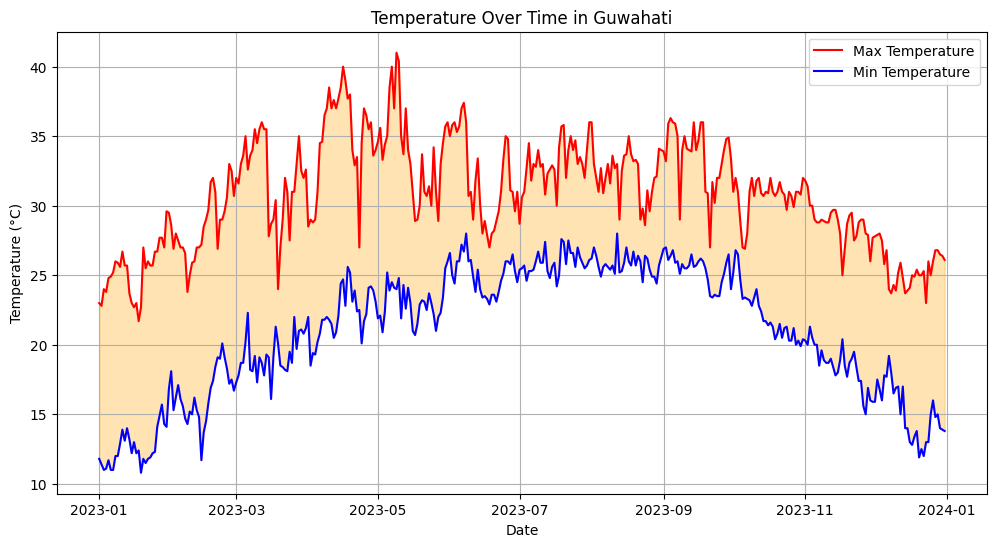

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the datetime column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'])

# Plot the temperature over time
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['tempmax'], color='red', label='Max Temperature')
plt.plot(data['datetime'], data['tempmin'], color='blue', label='Min Temperature')
plt.fill_between(data['datetime'], data['tempmin'], data['tempmax'], color='orange', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time in Guwahati')
plt.legend()
plt.grid(True)
plt.show()


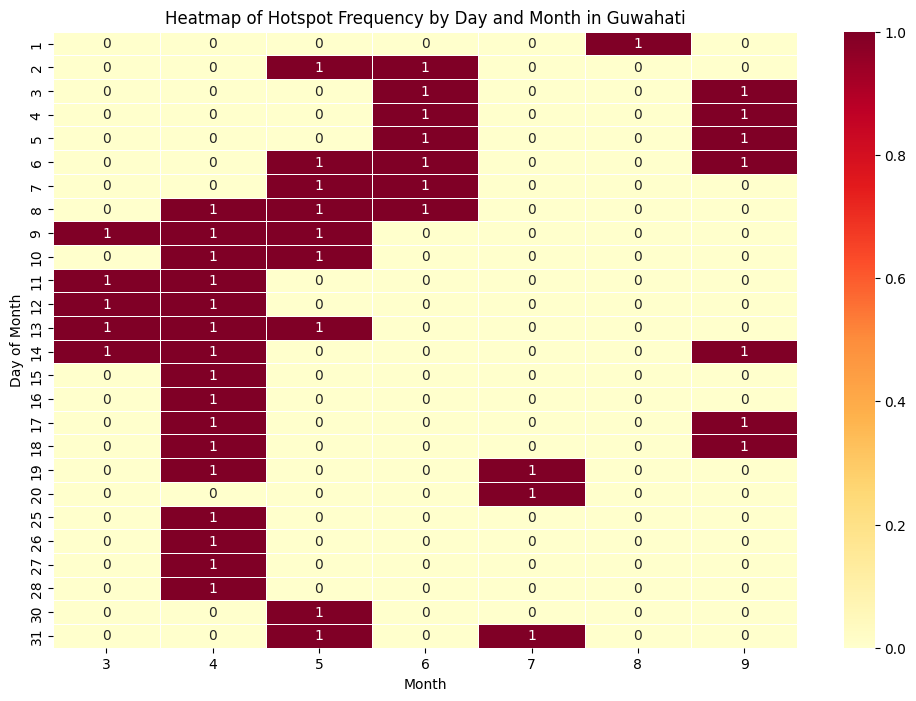

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the datetime column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'])

# Extract month and day from the datetime column
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day

# Define a temperature threshold for identifying hotspots (e.g., tempmax > 35°C)
hotspot_threshold = 35

# Filter the data to include only hotspot days
hotspot_data = data[data['tempmax'] > hotspot_threshold]

# Create a pivot table for the heatmap: counting occurrences of hotspots by day and month
heatmap_data = hotspot_data.pivot_table(index='day', columns='month', values='tempmax', aggfunc='count', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt='d', linewidths=.5)

# Add titles and labels
plt.title('Heatmap of Hotspot Frequency by Day and Month in Guwahati')
plt.xlabel('Month')
plt.ylabel('Day of Month')

# Show the plot
plt.show()




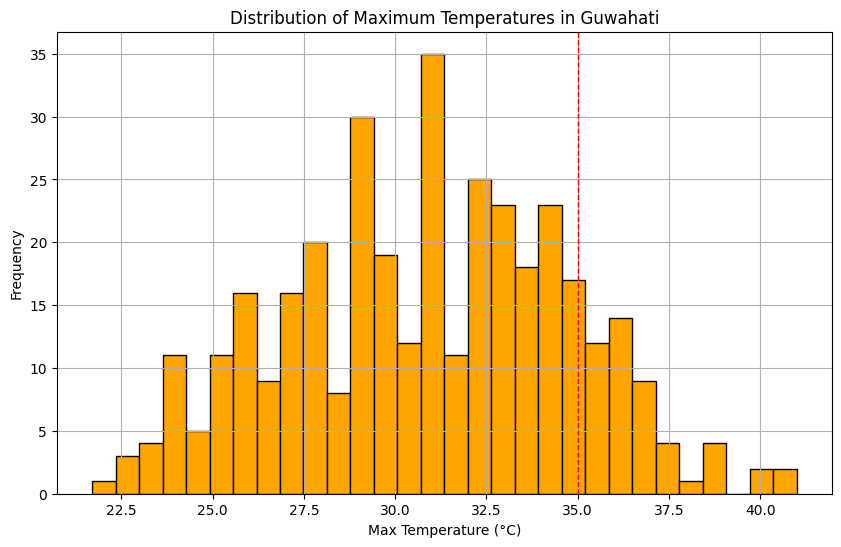

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data['tempmax'], bins=30, color='orange', edgecolor='black')
plt.axvline(35, color='red', linestyle='dashed', linewidth=1)  # Threshold for hotspot identification
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Temperatures in Guwahati')
plt.grid(True)
plt.show()
